# TASK 1

In [20]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [10]:
#Set the path to your ZIP file (update if in a different folder)
zip_path = r'C:\Users\Admin\Downloads\API_SL.TLF.ACTI.1524.MA.ZS_DS2_en_csv_v2_7642.zip'

#Open and read the relevant CSV file inside the ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    
# Automatically detect the main CSV file
    for file in z.namelist():
        if file.endswith('.csv') and file.startswith('API_'):
            csv_file = file
            break
    
    with z.open(csv_file) as f:
        # Read the CSV file (skipping metadata rows)
        df = pd.read_csv(f, skiprows=4)

# Continue with your work
print(df.head(5))
print(df.tail(5))
print("Number of duplicate rows:", df.duplicated().sum())
print("\nList of unique countries:\n", df['Country Name'].unique())
print("\nTotal number of unique countries:", df['Country Name'].nunique())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                      Indicator Name          Indicator Code  \
0  Labor force participation rate for ages 15-24,...  SL.TLF.ACTI.1524.MA.ZS   
1  Labor force participation rate for ages 15-24,...  SL.TLF.ACTI.1524.MA.ZS   
2  Labor force participation rate for ages 15-24,...  SL.TLF.ACTI.1524.MA.ZS   
3  Labor force participation rate for ages 15-24,...  SL.TLF.ACTI.1524.MA.ZS   
4  Labor force participation rate for ages 15-24,...  SL.TLF.ACTI.1524.MA.ZS   

   1960  1961  1962  1963  1964  1965  ...       2016       2017       2018  \
0   NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN        NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  53.444323  52.546561  51.841573   

C:\Users\Admin\AppData\Local\Temp\ipykernel_7476\1065428343.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='2024', y='Country Name', palette='crest')


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

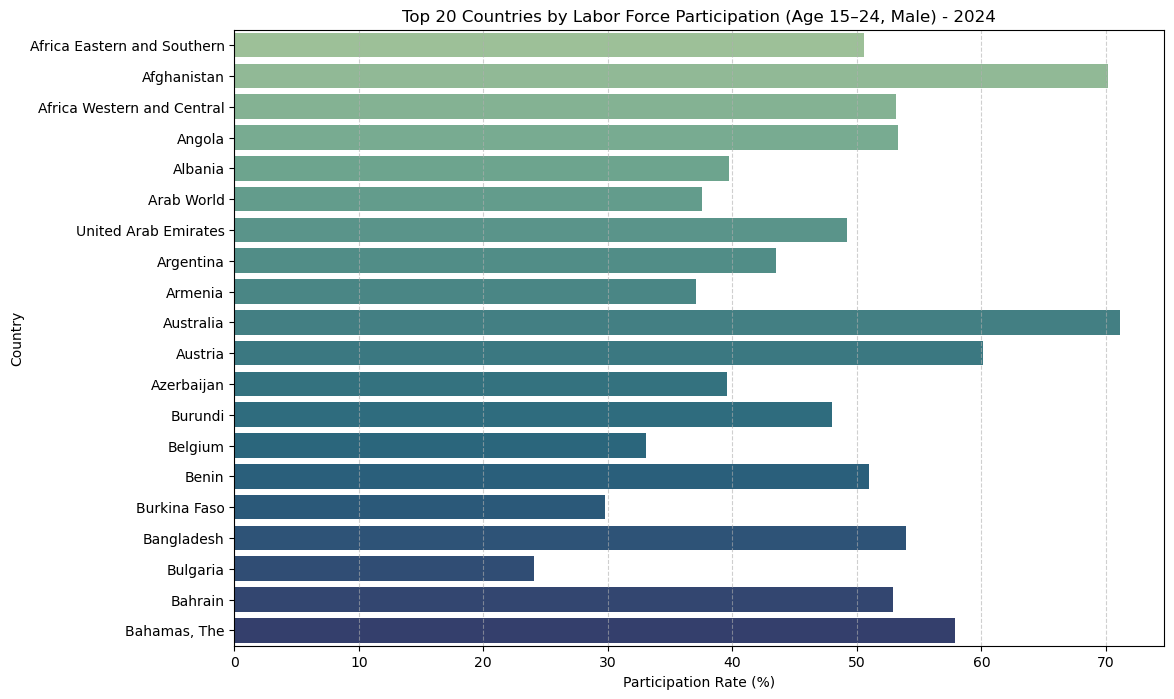

In [14]:
# Select the relevant columns for plotting
df_2024 = df[['Country Name', '2024']].copy()

# Drop rows with missing values for 2024
df_2024 = df_2024.dropna()
# Select top 20 countries by 2024 value
top20 = df_2024.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top20, x='2024', y='Country Name', palette='crest')

plt.title('Top 20 Countries by Labor Force Participation (Age 15–24, Male) - 2024')
plt.xlabel('Participation Rate (%)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight

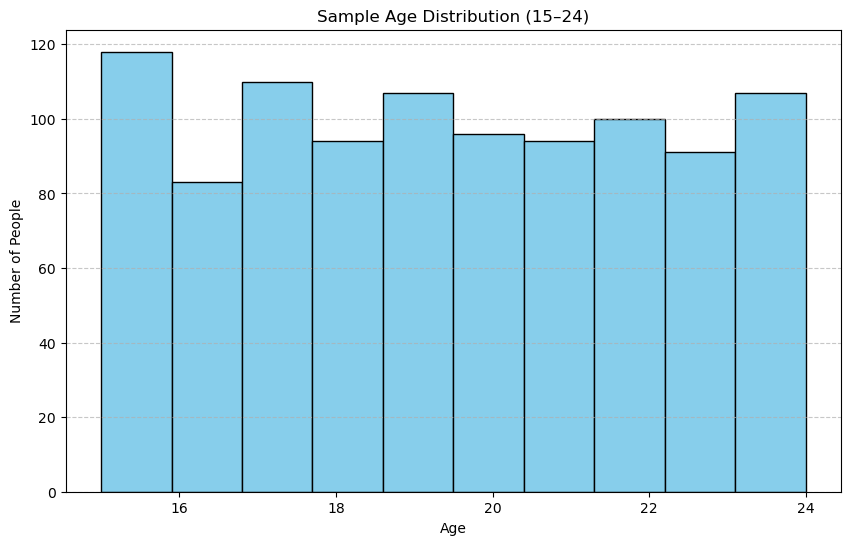

In [16]:
# Simulate sample ages of 1000 individuals between 15 and 24
np.random.seed(42)
sample_ages = np.random.randint(15, 25, 1000)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sample_ages, bins=10, color='skyblue', edgecolor='black')
plt.title('Sample Age Distribution (15–24)')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


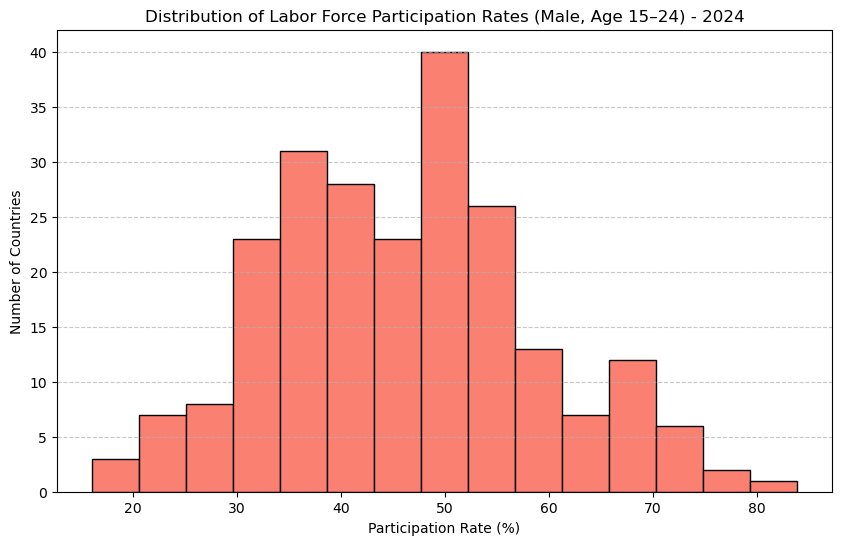

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df_2024['2024'].dropna(), bins=15, color='salmon', edgecolor='black')
plt.title('Distribution of Labor Force Participation Rates (Male, Age 15–24) - 2024')
plt.xlabel('Participation Rate (%)')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7476\2839880978.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_avg, x='Avg_2010_2024', y='Country Name', palette='viridis')


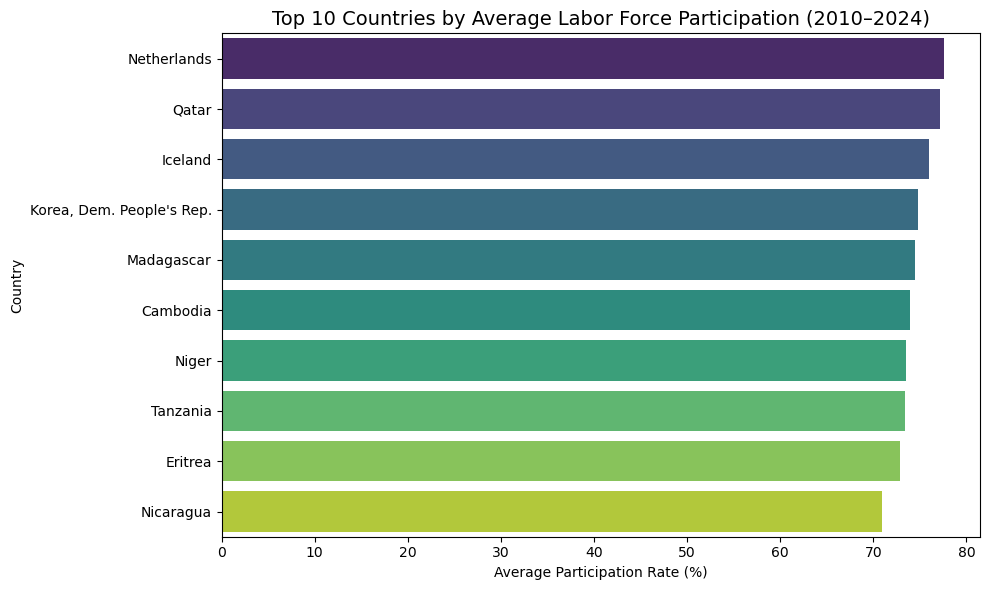

In [22]:
# Calculate average participation from 2010 to 2024
df['Avg_2010_2024'] = df.loc[:, '2010':'2024'].mean(axis=1)

# Sort and get top 10 countries
top10_avg = df[['Country Name', 'Avg_2010_2024']].sort_values(by='Avg_2010_2024', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_avg, x='Avg_2010_2024', y='Country Name', palette='viridis')
plt.title('Top 10 Countries by Average Labor Force Participation (2010–2024)', fontsize=14)
plt.xlabel('Average Participation Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

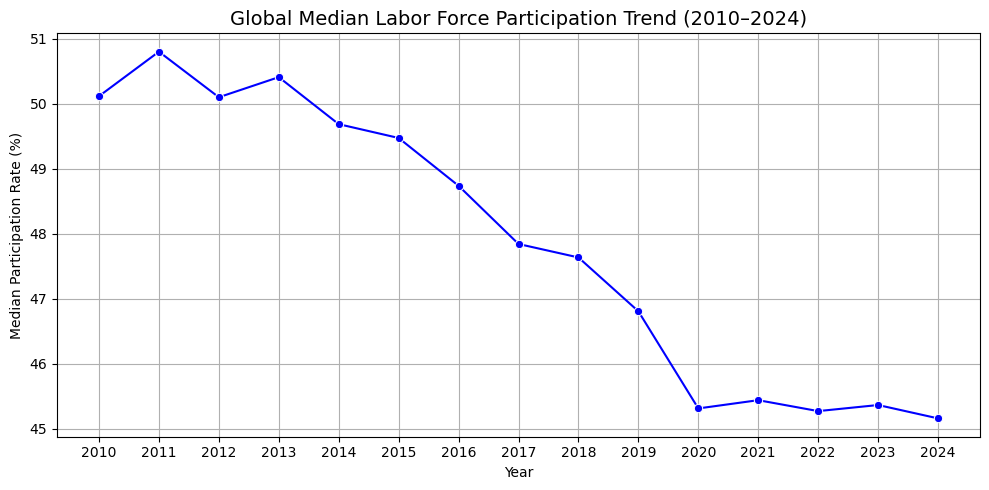

In [24]:
# Calculate median participation per year
median_trend = df.loc[:, '2010':'2024'].median()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=median_trend.index, y=median_trend.values, marker='o', color='blue')
plt.title('Global Median Labor Force Participation Trend (2010–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Median Participation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

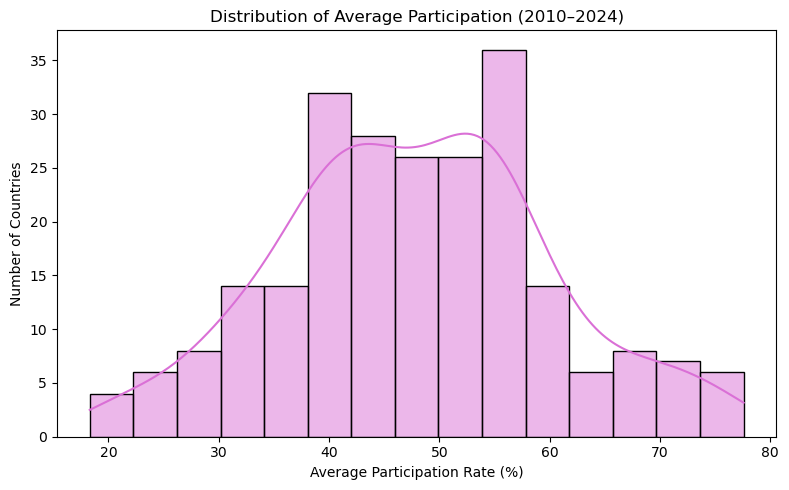

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_2010_2024'].dropna(), bins=15, kde=True, color='orchid')
plt.title('Distribution of Average Participation (2010–2024)')
plt.xlabel('Average Participation Rate (%)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

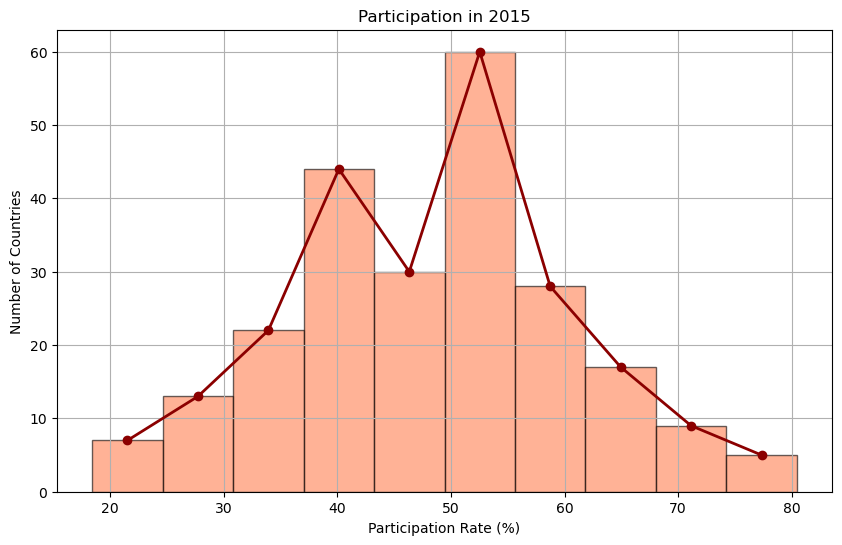

In [30]:
data_2015 = df['2015'].dropna()
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(data_2015, bins=10, alpha=0.6, color='coral', edgecolor='black')

# Add midpoint line
midpoints = 0.5 * (bins[1:] + bins[:-1])
plt.plot(midpoints, counts, color='darkred', marker='o', linestyle='-', linewidth=2)

plt.title('Participation in 2015')
plt.xlabel('Participation Rate (%)')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7476\2841119944.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10_avg, x='Avg_2010_2024', y='Country Name', palette='cubehelix')


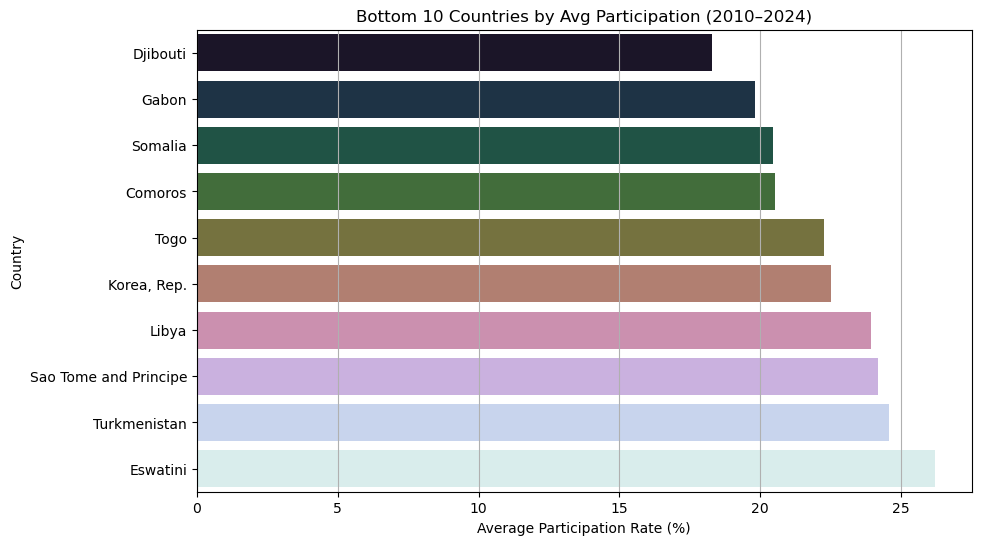

In [32]:
df['Avg_2010_2024'] = df.loc[:, '2010':'2024'].mean(axis=1)
bottom10_avg = df[['Country Name', 'Avg_2010_2024']].sort_values(by='Avg_2010_2024').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom10_avg, x='Avg_2010_2024', y='Country Name', palette='cubehelix')
plt.title('Bottom 10 Countries by Avg Participation (2010–2024)')
plt.xlabel('Average Participation Rate (%)')
plt.ylabel('Country')
plt.grid(True, axis='x')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7476\700897074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decline, x='Change_2010_2024', y='Country Name', palette='Reds_r')


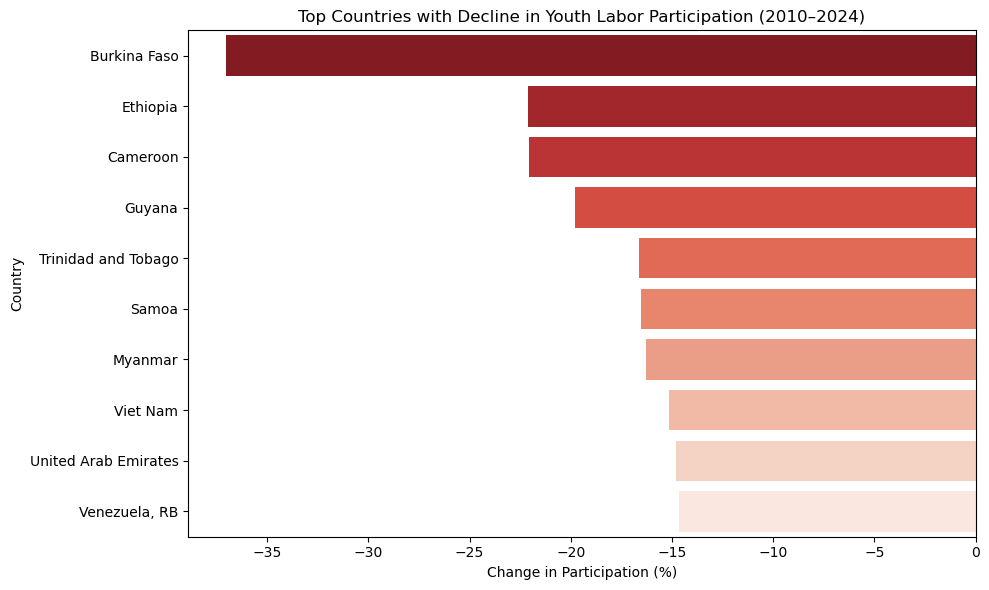

In [34]:
df['Change_2010_2024'] = df['2024'] - df['2010']
decline = df[df['Change_2010_2024'] < 0].sort_values(by='Change_2010_2024').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=decline, x='Change_2010_2024', y='Country Name', palette='Reds_r')
plt.title('Top Countries with Decline in Youth Labor Participation (2010–2024)')
plt.xlabel('Change in Participation (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

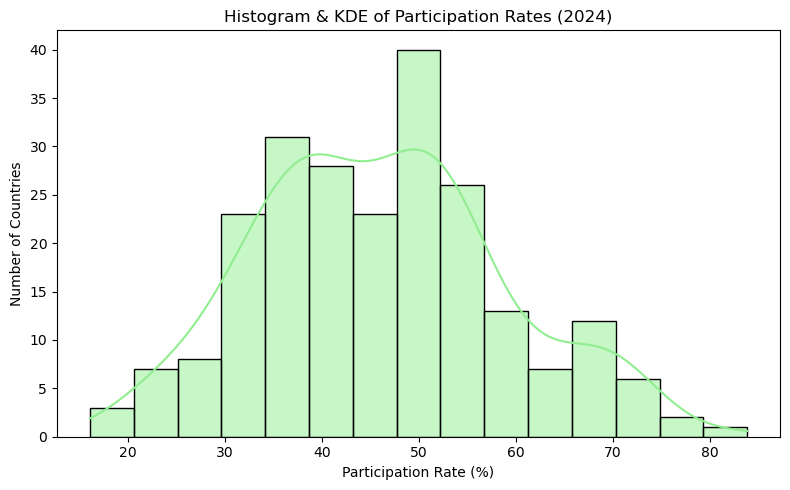

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['2024'].dropna(), bins=15, kde=True, color='lightgreen', edgecolor='black')
plt.title('Histogram & KDE of Participation Rates (2024)')
plt.xlabel('Participation Rate (%)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7476\2230565262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_variability, x='std_dev', y='Country Name', palette='mako')


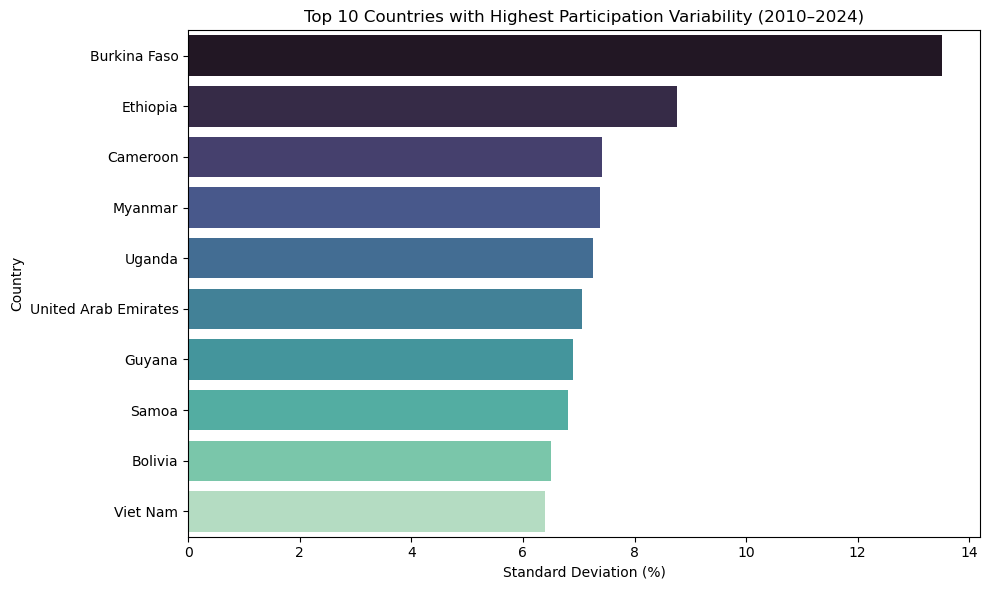

In [38]:
df['std_dev'] = df.loc[:, '2010':'2024'].std(axis=1)
high_variability = df[['Country Name', 'std_dev']].sort_values(by='std_dev', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=high_variability, x='std_dev', y='Country Name', palette='mako')
plt.title('Top 10 Countries with Highest Participation Variability (2010–2024)')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7476\43814293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_variability, x='std_dev', y='Country Name', palette='Purples')


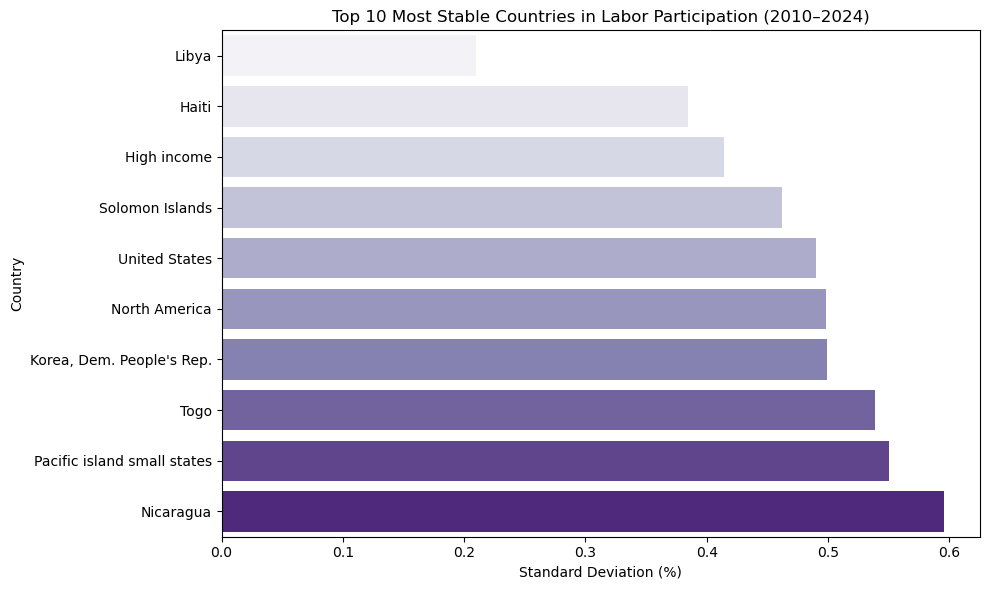

In [42]:
low_variability = df[['Country Name', 'std_dev']].sort_values(by='std_dev').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=low_variability, x='std_dev', y='Country Name', palette='Purples')
plt.title('Top 10 Most Stable Countries in Labor Participation (2010–2024)')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7476\1204027673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='Set2')


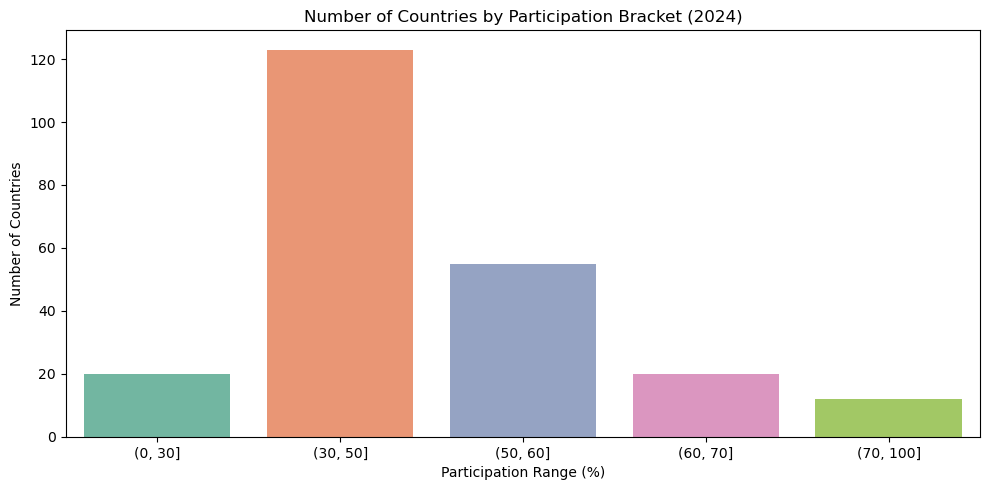

In [44]:
participation_range = pd.cut(df['2024'], bins=[0, 30, 50, 60, 70, 100])
range_counts = participation_range.value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=range_counts.index.astype(str), y=range_counts.values, palette='Set2')
plt.title('Number of Countries by Participation Bracket (2024)')
plt.xlabel('Participation Range (%)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()